<a href="https://colab.research.google.com/github/Fdvanleeuwen/Multistep_RNN/blob/main/Generate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import random

In [16]:
# def variables
n_timepoints = 10
N_participants = 1000

In [17]:
# variables
def gen_Z(u, s, n_timepoints):
  Z = np.random.normal(u, s, size = n_timepoints)
  return Z

def gen_X_time_var(u, s, n_timepoints, Z):
  X = np.random.normal(u, s, size = n_timepoints) +  0.5*Z
  return X

def gen_X_time_invar(max, n_timepoints):
  X =  np.repeat(random.randrange(20),n_timepoints)
  return X

In [18]:
# generate empty dataframe
total_rows = N_participants*n_timepoints
df = pd.DataFrame({"Time" : np.zeros(total_rows),
                   "Participant" : np.zeros(total_rows),
                   "Y" : np.zeros(total_rows),
                   "X1" : np.zeros(total_rows),
                   "X2" : np.zeros(total_rows),
                   "X3" : np.zeros(total_rows)})

In [19]:
# set params
time = 0
Z_mean = 1
Z_var = 1
X1_mean = 0
X1_var = 1
X2_mean = 5
X2_var = 1
X3_max = 20

In [28]:
# loop over examples
for i in range(N_participants):

  Z = gen_Z(Z_mean, Z_var, n_timepoints)

  X1 = gen_X_time_var(X1_mean, X1_var, n_timepoints, Z)

  X2 = gen_X_time_var(X2_mean, X2_var, n_timepoints, Z)

  X3 = gen_X_time_invar(X3_max, n_timepoints)

  y = np.sin(X1 + X2 + X3) #+ np.sqrt(list(range(0, n_timepoints)))

  df['Participant'][(i*n_timepoints):(n_timepoints+i*n_timepoints)] = i* 2 + 3
  df['Time'][(i*n_timepoints):(n_timepoints+i*n_timepoints)] = list(range(0, n_timepoints))
  df['Y'][(i*n_timepoints):(n_timepoints+i*n_timepoints)] = y
  df['X1'][(i*n_timepoints):(n_timepoints+i*n_timepoints)] = X1
  df['X2'][(i*n_timepoints):(n_timepoints+i*n_timepoints)] = X2
  df['X3'][(i*n_timepoints):(n_timepoints+i*n_timepoints)] = X3

In [29]:
# inspect result
df

,Time,Participant,Y,X1,X2,X3
0,0.0,3.0,0.190285,0.591901,6.165922,6.0
1,1.0,3.0,-0.879002,0.330368,4.168174,6.0
2,2.0,3.0,-0.539675,-0.224374,6.220694,6.0
3,3.0,3.0,0.565615,1.251355,5.916195,6.0
4,4.0,3.0,0.456603,0.026169,7.014375,6.0
...,...,...,...,...,...,...
9995,5.0,2001.0,0.978962,0.351327,4.297169,3.0
9996,6.0,2001.0,0.839769,-0.813309,5.093353,3.0
9997,7.0,2001.0,-0.997884,0.612248,7.318260,3.0
9998,8.0,2001.0,-0.809445,1.340129,6.027855,3.0


In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,10000.0,4.500000,2.872425,0.000000,2.000000,4.500000,7.000000,9.000000
Participant,10000.0,1002.000000,577.378850,3.000000,502.500000,1002.000000,1501.500000,2001.000000
Y,10000.0,0.007288,0.703968,-1.000000,-0.696813,0.011725,0.711032,1.000000
X1,10000.0,0.497272,1.118054,-3.895756,-0.264699,0.497797,1.240688,4.974280
X2,10000.0,5.510267,1.113671,1.424627,4.764013,5.507626,6.257558,9.908771
X3,10000.0,9.441000,5.803782,0.000000,5.000000,9.000000,15.000000,19.000000


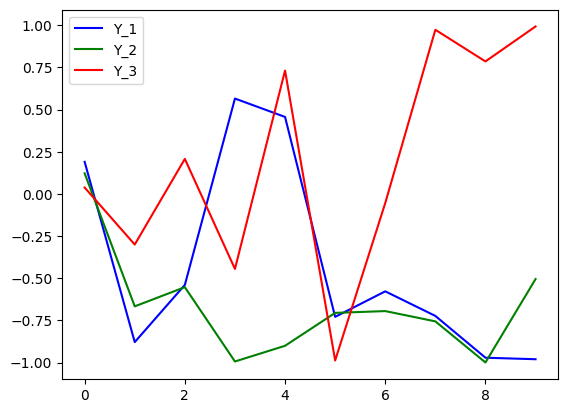

In [31]:
# plot for a couple of participants
plt.plot(df['Time'][0:10], df['Y'][0:10],   label = "Y_1", color = "blue")
plt.plot(df['Time'][10:20], df['Y'][10:20],  label = "Y_2", color = "green")
plt.plot(df['Time'][20:30], df['Y'][20:30], label = "Y_3", color = "red")
plt.legend()
plt.show()

In [24]:
from google.colab import drive

In [25]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
# save dataframe
df.to_csv('/content/gdrive/MyDrive/LSTM/sim_data_big.csv', index=False)

In [33]:
df_verify = pd.read_csv('/content/gdrive/My Drive/LSTM/sim_data.csv')
print(df_verify)

       Time  Participant         Y        X1         X2    X3
0       0.0          3.0  0.163502  1.179706  11.400460  19.0
1       1.0          3.0  0.639237  0.442837  -0.962367  19.0
2       2.0          3.0  1.012591  1.083714   8.603907  19.0
3       3.0          3.0  0.808060  5.137105  12.383619  19.0
4       4.0          3.0  1.572268 -2.603299  -6.529941  19.0
...     ...          ...       ...       ...        ...   ...
99995   5.0      20001.0  2.806449  2.259232  -0.085892  11.0
99996   6.0      20001.0  3.441301 -3.471758   0.453799  11.0
99997   7.0      20001.0  1.687440  1.323804  17.811090  11.0
99998   8.0      20001.0  1.852994 -2.885980   8.942624  11.0
99999   9.0      20001.0  3.389160  0.593608  13.938852  11.0

[100000 rows x 6 columns]
